# Laboratorio 3 - Diego Obregon

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys


### Parte 1: Numpy

#### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [12]:
arr1 = [True] * 1000
tamaño = sys.getsizeof(arr1)
print(f"El tamaño en bytes del array es: {tamaño}")

El tamaño en bytes del array es: 8056


#### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [13]:
arr2 = np.arange(100, 1, -2)
print("Los ultimos 10 numeros son:", arr2[-10:])

Los ultimos 10 numeros son: [20 18 16 14 12 10  8  6  4  2]


#### 3. Dado el array
######        2 4 5 6
######        0 3 7 4
######        8 8 5 2
######        1 5 6 1
#### Seleccione con una instrucción el subarray de elementos
######        0 3 7 4
#### Después, seleccione el subarray de elementos
######        2 5
######        8 5

In [17]:
arr3 = np.array(([2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]))
print(arr3[1, :])

[0 3 7 4]


In [18]:
arr3_1 = arr3[::2,::2]
print(arr3_1)

[[2 5]
 [8 5]]


#### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [19]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia = a - b

media_aritmetica = np.mean(diferencia)

print("La media aritmética es:", media_aritmetica)

La media aritmética es: -0.25


##### 5. Tengo valores de cordenadas (x, y) en las columnas del array 1.33 4.5; 30.0 10.7; 70.2 0.5 . Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [35]:
arr5 = np.array(([1.33,4.5],
                 [30.0,10.7],
                 [70.2,0.5]))

arr5_1 = np.append(arr5,[37.1,-3.6]).reshape(-1,2)
arr5_1

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [36]:
print(f"Las dimensiones del array de coordenadas es: {arr5_1.shape}")

Las dimensiones del array de coordenadas es: (4, 2)


In [ ]:
##### 6. Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [38]:
arr6 = arr5_1.T
arr6_1 = np.append(arr6, [[10.8, 35.8], [3.0, 12.0]], axis = 1)
arr6_1


array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

### Parte 2: Exploración y Minería de Datos

In [40]:
dataset= pd.read_csv("Lab3/NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


#### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [42]:
arr1 = len(dataset[dataset["Poblacion"] > 100000]["Municipio"].unique())

print(f"La cantidad de muncipios con mas de 100000 es: {arr1}")

La cantidad de muncipios con mas de 100000 es: 62


#### 2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
##### a. ¿Cuál es la segunda ciudad más poblada?
##### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

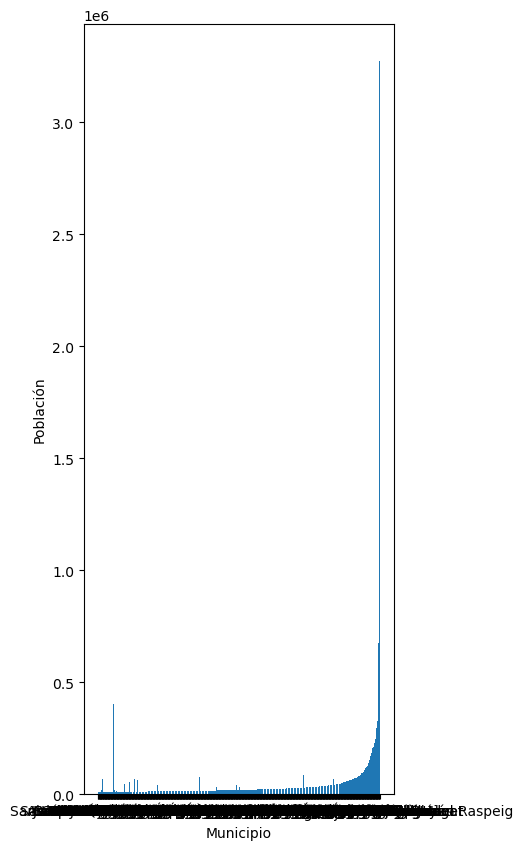

In [58]:
arr2 = dataset.sort_values("Poblacion", ascending = True)
plt.figure(figsize=(4,10))
plt.bar(poblacion["Municipio"], poblacion["Poblacion"])
plt.xlabel("Municipio")
plt.ylabel("Población")
plt.show()

In [60]:
arr2_1 = arr2["Municipio"].iloc[-2]
print("La segunda ciudad más poblada es:", (arr2_1))

La segunda ciudad más poblada es: Barcelona


In [63]:
arr2_3 = arr2[arr2["Municipio"] == "Granada"].index.item() + 1
print("Granada tiene la posicion numero",(arr2_3))

Granada tiene la posicion numero 273


#### 3. ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

In [66]:
arr3 = dataset[dataset["Provincia"] == "Navarra"]

arr3_1 = arr3[arr3["Poblacion"] > 5000]
arr3_2 = arr3_1.shape[0]

print("El numero de municipos de Navarra con mas de 5000 habitantes es:" , arr3_2)

El numero de municipos de Navarra con mas de 5000 habitantes es: 11


#### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [71]:
arr4 = dataset.loc[dataset["Y"].idxmax()]

print(f"El municipio más al norte es {arr4['Municipio']}, de la provincia de {arr4['Provincia']}, con una población de {arr4['Poblacion']}")


El municipio más al norte es Viveiro, de la provincia de Lugo, con una población de 16211.0


#### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [78]:
arr5 = dataset.loc[dataset["Provincia"] == "Granada"]

arr5_1 = arr5['Poblacion'].describe()

print("la estadistica descriptiva de Granada es:\n", (arr5_1))



la estadistica descriptiva de Granada es:
 count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


#### 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

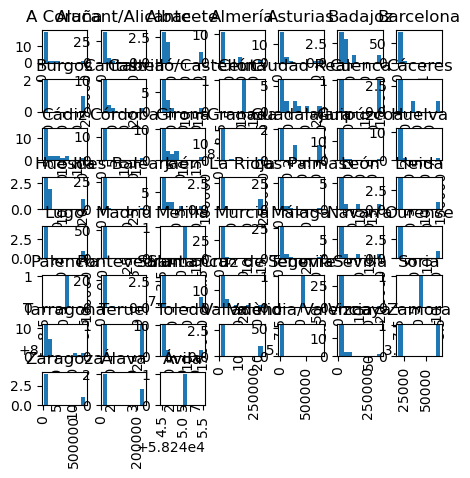

In [82]:
dataset.hist(column='Poblacion', by='Provincia', figsize=(5,5))

plt.title("Poblacion por municipio")
plt.xlabel("Poblacion")
plt.ylabel("Provincia")

plt.show()


#### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [88]:
import random

arr7 = dataset['Municipio'].unique().tolist()
arr7_1 = random.sample(arr7, 50)
arr7_2 = dataset[dataset['Municipio'].isin(arr7_1)]


promedio = arr7_2['Poblacion'].mean()
std = arr7_2['Poblacion'].std()
print("Los 50 municipos aleatoricios son:", arr7_1)

print(f"El Promedio de la población es: {round(promedio, 2)}")

print(f"La Desviación estándar de la población es: {round(std, 2)}")


Los 50 municipos aleatoricios son: ['Benicasim/Benicàssim', 'Vigo', 'O Porriño', 'Brenes', 'El Escorial', 'Consuegra', 'Baena', 'Tarazona', 'Oleiros', 'Sant Adrià de Besòs', 'Molina de Segura', 'Hellín', 'La Bañeza', 'Linares', 'Arrasate/Mondragón', 'Cardedeu', 'Vilafranca del Penedès', 'Toledo', 'Olesa de Montserrat', 'La Orotava', 'Calafell', 'Pinto', 'Huércal-Overa', 'Agüimes', 'Zamora', 'Ayamonte', 'Esparreguera', 'La Llagosta', 'Portugalete', 'Utrera', 'El Puerto de Santa María', 'Pamplona/Iruña', 'Pilas', 'Cádiz', 'Sada', 'Algeciras', 'Villaviciosa', 'Villanueva de la Serena', 'Quintanar de la Orden', 'Ávila', 'Azkoitia', 'Son Servera', 'Felanitx', 'Marchena', 'Vila-real', 'Santa Perpètua de Mogoda', 'Molins de Rei', 'Teulada', 'Mula', "L'Hospitalet de Llobregat"]
El Promedio de la población es: 43545.44
La Desviación estándar de la población es: 57251.96


#### 8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [93]:
coord_madrid = dataset.loc[dataset['Municipio'] == 'Madrid', ['X', 'Y']].values[0]

datos_sin_madrid = dataset[dataset['Municipio'] != 'Madrid']

distancias = np.linalg.norm(datos_sin_madrid[['X', 'Y']].values - coord_madrid, axis=1)

idx_min = np.argmin(distancias)
idx_max = np.argmax(distancias)

nombre_municipio_mas_cercano = datos_sin_madrid.iloc[idx_min]['Municipio']
nombre_municipio_mas_lejano = datos_sin_madrid.iloc[idx_max]['Municipio']

print(f"El municipio más cercano a Madrid es: {nombre_municipio_mas_cercano}")
print(f"El municipio más lejano a Madrid es: {nombre_municipio_mas_lejano}")


El municipio más cercano a Madrid es: Pozuelo de Alarcón
El municipio más lejano a Madrid es: Los Llanos de Aridane
